# Redes Neuronales Artificiales
## Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:


<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d6bm40h-hVkjVNaMuoEtJGa0praa2wUs" width=700></center>
</pre>

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0 = -\theta$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d25bKx-ne-tgg9aW3RbZiH_a3CrdsrKT" width=700></center>
</pre>

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple (también podría ser la función heaviside). Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d7FF-V_6ysD3yEYKnNIi_YBXFPuWkSJG" width=500></center>
</pre>

A continuación tenemos el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida $$y = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término de bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida deseada $y_d$ $$e = y - y_d$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso

In [19]:
# Librerías a importar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from modules.utiles import plot_decision_regions
from sklearn.preprocessing import StandardScaler

## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

>Nosotros vamos a utilizar nuestro perceptrón para separar dos clases de flores (Iris setosa e Iris versicolor) según dos de sus características: Largo de sépalo (primer columna en el dataset) y largo de pétalo (tercer columna).  

In [20]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Graficamos el Dataset

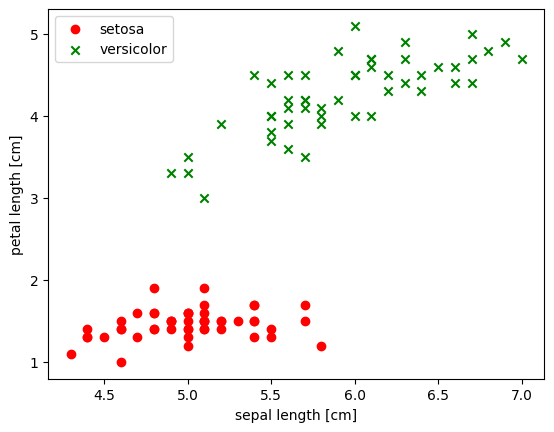

In [21]:
#graficamos para separar dos clases de flores segun las caracteristicas largo del sepalo y largo del petalo
#seleccionamos las columnas 1 y 3
X = df.iloc[0:100, [0, 2]].values
#seleccionamos las clases:
y = df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa',0,1)

#graficamos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='green', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# Entrenamiento del Perceptrón

Separar los datos en conjunto de entrenamiento y prueba (20%)

In [10]:
#separamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)


#randomstate es la semilla apra que simepre seleccione los mismos datos
#stratify es para que mantenga la proporcion de las clases en los datos de entrenamiento y test
#shuffle para mezclar los datos de entrenamiento, cuando la reproducción aleatoria está configurada en Verdadero

In [6]:
#Escalamos los datos porque el perceptron es sensible a la escala de los datos
standscaler = StandardScaler()
standscaler.fit(X_train)

#uso transform para que los datos queden escalados:
X_train_std = standscaler.transform(X_train)
X_test_std = standscaler.transform(X_test)

Entrenamos el perceptrón con un `eta=0.1`, una semilla `random_state=1` y `shuffle=True`. Ver [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [22]:
perceptron = Perceptron( eta0=0.1, random_state=1, shuffle=True)
#eta0 es la tasa de aprendizaje
#random_state es la semilla para el generador de numeros aleatorios
#shuffle es para mezclar los datos de entrenamiento en cada epoca

#entrenamos el modelo
perceptron.fit(X_train_std, y_train)
#x_train_std es el conjunto de entrenamiento escalado
#y_train son las etiquetas de clase correspondientes

Perceptron(eta0=0.1, random_state=1)

**coeficientes o pesos de la recta de separación**

In [23]:
#coeficientes o pesos de la recta de separacion porque es un modelo lineal:
print(perceptron.coef_)

#coef_ Pesos asignados a las características.

[[0.09963537 0.18697706]]


**constante u ordenada al origen de la recta**

In [24]:
#constante u ordenada al origen de la recta--> b
print(perceptron.intercept_)

#intercept_ Constantes en la función de decisión.

[0.1]


Recordemos la ecuación: $$y = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### _Ahora vamos a graficar esta recta!!_

Graficar la recta de separación del perceptrón simple. Graficar los datos de entrenamiento junto con los datos de prueba, muestre estos últimos con un borde negro para diferenciarlos de los datos de entrenamiento.

In [27]:
#------------------ Representación de la recta ------------------------------------
#calculo la recta: w1*x1 + w2*x2 + b = 0
m = -perceptron.coef_[0,0]/perceptron.coef_[0,1] #w1/w2
b = -perceptron.intercept_/perceptron.coef_[0,1] #w0/w2
#w0 es el bias o sesgo
#coef_ es el vector de pesos
#coef_[0,0] es el peso de la primera caracteristica
#coef_[0,1] es el peso de la segunda caracteristica

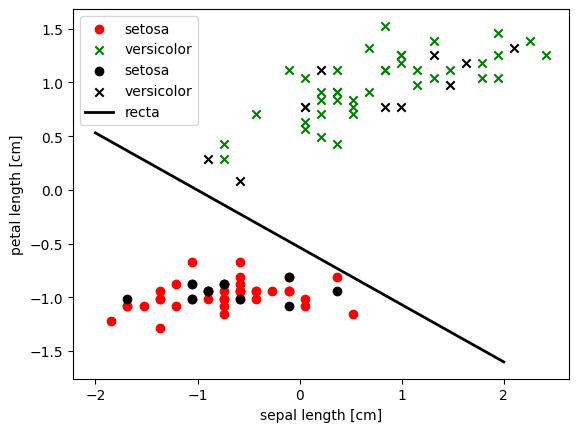

In [28]:
# ----------------------------------------------------------------------------------
#graficar datos de entrenamiento, prueba y la recta:
plt.scatter(X_train_std[:, 0][y_train==0], X_train_std[:, 1][y_train==0], color='red', marker='o', label='setosa')
plt.scatter(X_train_std[:, 0][y_train==1], X_train_std[:, 1][y_train==1], color='green', marker='x', label='versicolor')

plt.scatter(X_test_std[:, 0][y_test==0], X_test_std[:, 1][y_test==0], color='black', marker='o', label='setosa')
plt.scatter(X_test_std[:, 0][y_test==1], X_test_std[:, 1][y_test==1], color='black', marker='x', label='versicolor')

#y_train es el vector de etiquetas de clase correspondientes
#y_train==0 es para que seleccione los datos de la clase 0
#y_train==1 es para que seleccione los datos de la clase 1
#X_train_std[:, 0] es para que seleccione los datos de la primera caracteristica
#X_train_std[:, 1] es para que seleccione los datos de la segunda caracteristica
#x_train_std es el conjunto de entrenamiento escalado

#graficar la recta:
x = np.linspace(-2, 2, 100) #linespace porque es una recta
plt.plot(x, m*x+b, color='black', linestyle='-', linewidth=2, label='recta')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left') #loc es la posicion de la leyenda
plt.show()


Ahora grafique los datos usando la función `plot_decision_regions` del módulo `utiles.py`, grafique datos de entrenamiento y prueba (se le deben pasar los índices de los datos de prueba a la función).

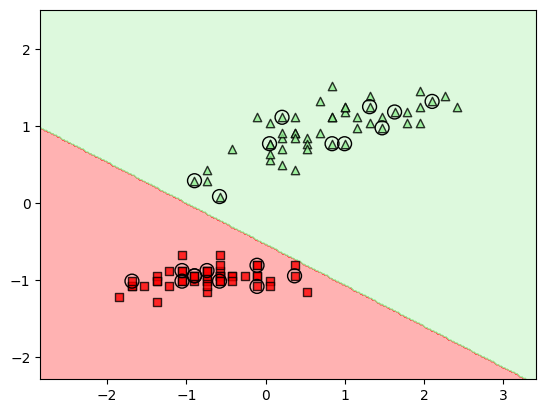

In [29]:
#cocateno datos de entrenamiento y prueba
#vstack apila vectores verticalmente para formar una matriz
#hstack apila vectores horizontalmente para formar una matriz
X_c = np.vstack((X_train_std, X_test_std))
y_c = np.hstack((y_train, y_test))

#grafico usando plot_decision_regions
plot_decision_regions(X_c, y_c, perceptron, test_idx=range(80,100))

#Plot_decision_regions es una funcion que grafica los datos de entrenamiento y prueba

Utilice la función `accuracy_score` para obtener el desempeño con los datos de prueba. [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [30]:
#uso accuracy_score para calcular el accuracy
y_pred = perceptron.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#predigo para los datos de prueba
#x_test_std es el conjunto de prueba escalado
#y_test son las etiquetas de clase correspondientes
#y_pred son las etiquetas de clase predichas
#accuracy_score es una funcion que calcula el accuracy

#accuracy de 1 significa que el modelo clasifico correctamente todos los datos de prueba

Accuracy: 1.00


Ahora repita el procedimiento pero con las 3 clases e iguales características y grafique la región de decisión usando la función `plot_decision_regions`

In [31]:
from sklearn import datasets

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [32]:
#repetir el procedimiento pero con las 3 clases e iguales características
X_extra = iris_df.iloc[:, [0, 2]].values
#iloc es para seleccionar filas y columnas por su indice
y_extra = iris_df.iloc[:, 4].values
y_extra = np.where(y_extra=='Iris-setosa', 0, np.where(y_extra=='Iris-versicolor', 1, 2))


In [34]:
#separamos los datos en entrenamiento y test
X2_train, X2_test, y2_train, y2_test = train_test_split(X_extra, y_extra, test_size=0.2, random_state=1, stratify=y_extra, shuffle=True)

#Escalamos los datos
standscaler = StandardScaler()
standscaler.fit(X2_train)
X2_train_std = standscaler.transform(X2_train)
X2_test_std = standscaler.transform(X2_test)

In [35]:
perceptron2 = Perceptron( eta0=0.1, random_state=1, shuffle=True)
#entrenamos el modelo
perceptron2.fit(X2_train_std, y2_train)


Perceptron(eta0=0.1, random_state=1)

In [36]:
print(perceptron2.coef_)

[[ 0.02018616 -0.21361277]
 [-0.25058679  0.11213269]
 [-0.04226166  0.79333877]]


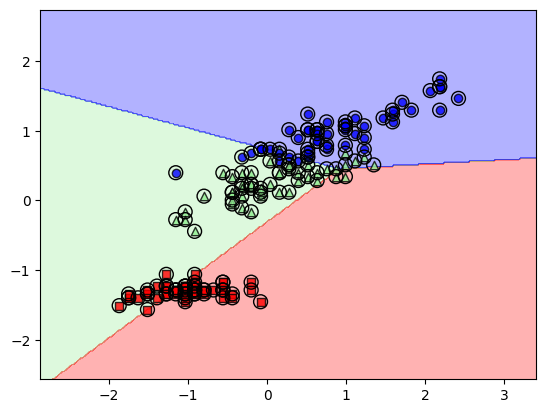

In [37]:
#cocateno datos de entrenamiento y prueba
X_c2 = np.vstack((X2_train_std, X2_test_std))
y_c2 = np.hstack((y2_train, y2_test))

#grafico usando plot_decision_regions
plot_decision_regions(X_c2, y_c2, perceptron2, test_idx=range(0,150))


In [38]:
y_pred2 = perceptron.predict(X2_test_std)
print('Accuracy: %.2f' % accuracy_score(y2_test, y_pred2))

Accuracy: 0.60
